ML-Tutorial 01: Data Analysis Workflow

Step 1: Data Exploration
1. Viewing the Data: Load the dataset and inspect the first few rows to understand its structure.
2. Dataset Proportions: Check the shape of the dataset to know rows and columns.
3. Missing Values: Detect missing values.
4. Data Types: Review column data types for correctness.
5. Duplicate Values: Identify duplicate rows.
6. Outlier Detection: Detect outliers using Z-scores or boxplot.
7. Data Distribution: Check target variable imbalance

Step 2: Data Preprocessing
1. Duplicate values: remove duplicate rows
2. Missing values: Handle the missing values (e.g., using forward-fill, mean imputation).
3. Remove Outliers: Filter extreme outliers using statistical measures.
4. Convert Categorical to Numeric: Use one-hot encoding for nominal and ordinal encoding for ordered data.
5. Balance the Data: Handle imbalanced target variables using oversampling techniques (e.g.SMOTE)
6. Scale the Data: Normalize data using Min-Max or Standard scaling methods.

Step 3: Splitting the Dataset
Divide the dataset as follows:
• 70% Training Data
• 10% Validation Data
• 20% Testing Data

Step 4: Save the Processed Dataset
Save the cleaned dataset for future use in formats like .csv.

Step 5: Train a Basic Model (optional)
Train a Logistic Regression model using the training dataset. Evaluate performance using metrics such
as accuracy, precision, recall, and F1-score on the validation and testing datasets.

DATA EXPLORATION

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [3]:
df=pd.read_csv("adult_income.csv")

In [4]:
df.sample(5)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
19512,52,?,134447,Some-college,10,Married-civ-spouse,?,Husband,White,Male,0,0,50,United-States,<=50K
31562,29,Private,100563,HS-grad,9,Never-married,Transport-moving,Own-child,Black,Male,0,0,40,United-States,<=50K
28352,27,Federal-gov,148153,HS-grad,9,Married-civ-spouse,Handlers-cleaners,Husband,Asian-Pac-Islander,Male,0,0,40,United-States,<=50K
16746,37,Private,126708,HS-grad,9,Married-civ-spouse,Adm-clerical,Wife,White,Female,0,0,60,United-States,<=50K
10757,29,Private,191177,HS-grad,9,Married-civ-spouse,Adm-clerical,Wife,White,Female,0,0,18,United-States,<=50K


In [5]:
df.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [6]:
df.shape

(48842, 15)

In [7]:
df.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [9]:
df.duplicated().sum()

52

In [10]:
#OUTLIER DETECTION
numeric_cols=df.select_dtypes(include=np.number).columns
z_scores=np.abs(stats.zscore(df[numeric_cols].dropna()))
outliers=(z_scores>3).sum(axis=0)
outliers

age                 186
fnlwgt              506
educational-num     330
capital-gain        331
capital-loss       2216
hours-per-week      681
dtype: int64

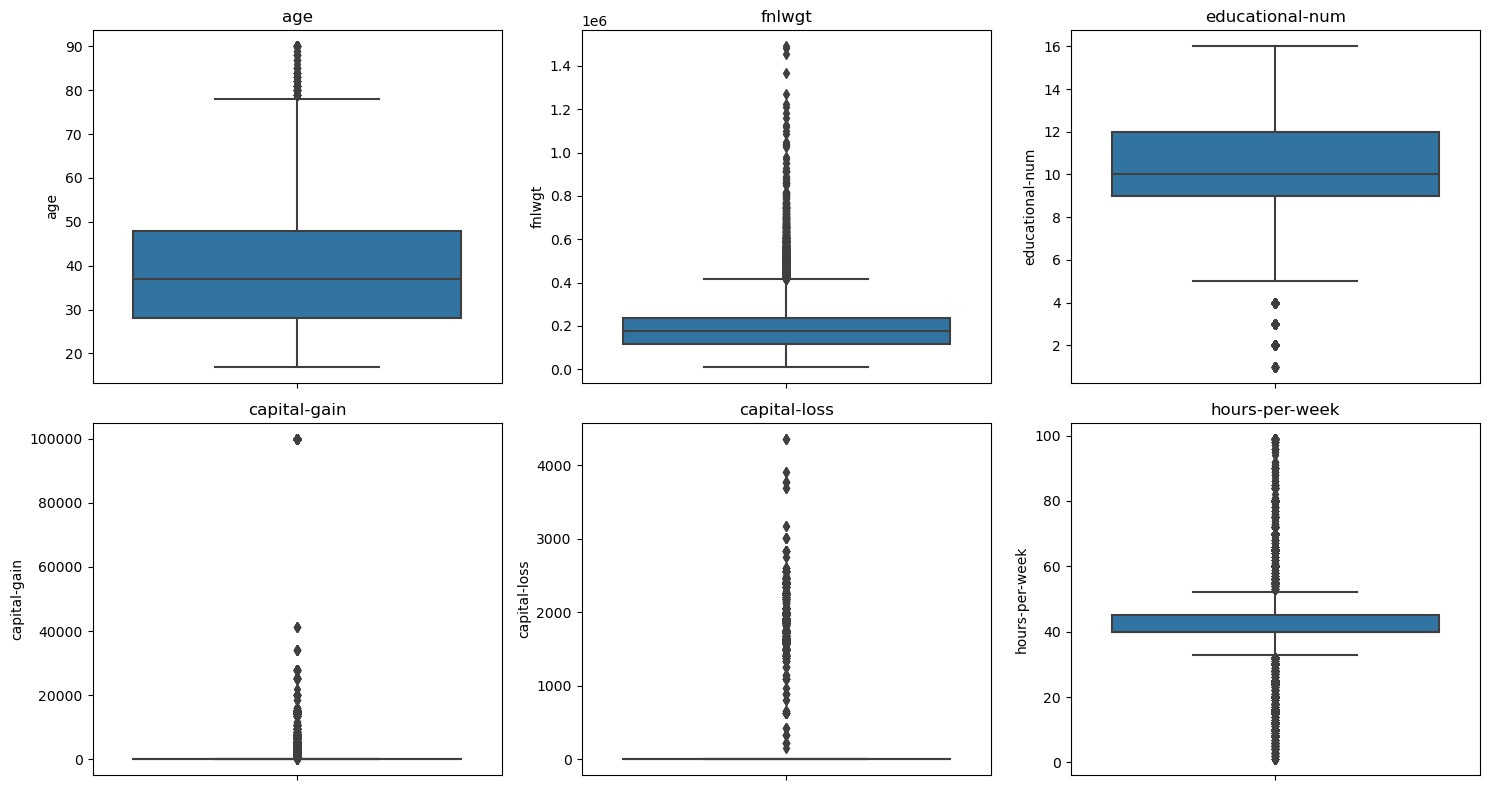

In [11]:
# BOX PLOT 
numeric_cols=df.select_dtypes(include=np.number).columns # this is for selecting numeric columns
plt.figure(figsize=(15,8))# this will set the fig size
for i,col in enumerate(numeric_cols,1):#this will generate box plot for each columns
    plt.subplot(2,3,i)
    sns.boxplot(y=df[col])
    plt.title(col)
    
plt.tight_layout()
plt.show()

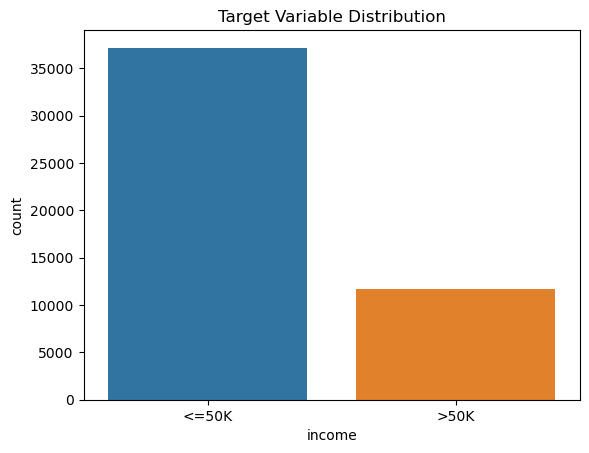

In [12]:
# target variable distribution 
target_col="income"
sns.countplot(data=df,x=target_col)
plt.title("Target Variable Distribution")
plt.show()

DATA PREPROCESSING

In [13]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder
from imblearn.over_sampling import SMOTE


In [14]:
df=df.drop_duplicates()# remove the duplicates rows

In [15]:
df.shape

(48790, 15)

In [16]:
#handling missing values
df.fillna(method='ffill',inplace=True)

C:\Users\MAYUR ARYA\AppData\Local\Temp\ipykernel_16568\2470332310.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill',inplace=True)


In [17]:
#handling Outliers using IQR
Q1=df[numeric_cols].quantile(0.25)
Q3=df[numeric_cols].quantile(0.75)
IQR=Q3-Q1
df=df[~((df[numeric_cols]<(Q1-1.5*IQR))| (df[numeric_cols]>(Q3+1.5*IQR))).any(axis=1)]

In [18]:
#Convert Categorical to Numeric
#Use one-hot encoding for nominal and ordinal encoding for ordered data.
cat_cols = df.select_dtypes(include='object').columns.drop(target_col)
df = pd.get_dummies(df, columns=cat_cols)

In [19]:
df.sample(5)

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,income,workclass_?,workclass_Federal-gov,workclass_Local-gov,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
41535,50,74879,9,0,0,40,<=50K,False,False,False,...,False,False,False,False,False,False,False,True,False,False
15069,39,410509,9,0,0,40,<=50K,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2322,48,232149,13,0,0,40,<=50K,False,False,False,...,False,False,False,False,False,False,False,True,False,False
48490,35,241153,11,0,0,40,<=50K,False,False,False,...,False,False,False,False,False,False,False,True,False,False
16032,56,124319,14,0,0,40,>50K,True,False,False,...,False,False,False,False,False,False,False,True,False,False


In [20]:
df.shape

(28523, 104)

In [21]:
#Balance the Data:
#Handle imbalanced target variables using oversampling techniques (e.g.SMOTE)
X = df.drop(target_col, axis=1)
y = df[target_col]
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)

In [22]:
X_res

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,workclass_?,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,25,226802,7,0,0,40,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1,38,89814,9,0,0,50,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,28,336951,12,0,0,40,False,False,True,False,...,False,False,False,False,False,False,False,True,False,False
3,29,227026,9,0,0,40,True,False,False,False,...,False,False,False,False,False,False,False,True,False,False
4,24,369667,10,0,0,40,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45015,26,68731,9,0,0,49,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
45016,43,71712,10,0,0,41,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
45017,52,101647,10,0,0,43,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
45018,51,290851,13,0,0,40,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False


In [23]:
#Scale the Data: Normalize data using Min-Max or Standard scaling methods
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_res)

In [24]:
X_scaled

array([[-1.34723777,  0.53294203, -1.71945159, ...,  0.3673533 ,
        -0.0352908 , -0.01632848],
       [-0.17147116, -1.0447639 , -0.750055  , ...,  0.3673533 ,
        -0.0352908 , -0.01632848],
       [-1.07590702,  1.80154023,  0.70403989, ...,  0.3673533 ,
        -0.0352908 , -0.01632848],
       ...,
       [ 1.09473905, -0.90848194, -0.26535671, ...,  0.3673533 ,
        -0.0352908 , -0.01632848],
       [ 1.00429546,  1.27060144,  1.18873818, ...,  0.3673533 ,
        -0.0352908 , -0.01632848],
       [ 0.46163395,  0.39584234,  1.18873818, ..., -2.7221751 ,
        -0.0352908 , -0.01632848]])

SPLITTING THE DATASET

In [25]:
#Divide the dataset as follows:
#• 70% Training Data
#• 10% Validation Data
#• 20% Testing Data
from sklearn.model_selection import train_test_split

X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y_res, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=2/3, random_state=42)

print(f"Train: {X_train.shape}, Validation: {X_val.shape}, Test: {X_test.shape}")


Train: (31514, 103), Validation: (4502, 103), Test: (9004, 103)


In [27]:
y_val.head()

4086      >50K
30546     >50K
20436    <=50K
44576     >50K
12639    <=50K
Name: income, dtype: object

SAVE THE PROCESSED DATA

In [28]:
#Save the cleaned dataset for future use in formats like .csv
processed_df = pd.DataFrame(X_res, columns=X.columns)
processed_df[target_col] = y_res
processed_df.to_csv('adult_income_cleaned.csv', index=False)
print("Processed dataset saved.")


C:\Users\MAYUR ARYA\AppData\Local\Temp\ipykernel_1444\2827807947.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  processed_df[target_col] = y_res


Processed dataset saved.


TRAIN A BASIC MODEDL

In [32]:
#Train a Logistic Regression model using the training dataset. Evaluate performance using metrics such
#as accuracy, precision, recall, and F1-score on the validation and testing datasets.

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)

# Evaluate
print("Validation Report:\n", classification_report(y_val, model.predict(X_val)))
print("Test Report:\n", classification_report(y_test, model.predict(X_test)))


Validation Report:
               precision    recall  f1-score   support

       <=50K       0.88      0.93      0.90      2283
        >50K       0.92      0.87      0.89      2219

    accuracy                           0.90      4502
   macro avg       0.90      0.90      0.90      4502
weighted avg       0.90      0.90      0.90      4502

Test Report:
               precision    recall  f1-score   support

       <=50K       0.87      0.93      0.90      4467
        >50K       0.93      0.87      0.90      4537

    accuracy                           0.90      9004
   macro avg       0.90      0.90      0.90      9004
weighted avg       0.90      0.90      0.90      9004

